In [43]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [62]:
df1 = pd.read_excel("focused1.xlsx")

In [63]:
df1

,Frame Number,Category Detected
0,1,Neutral - Focused State
1,2,Neutral - Focused State
2,3,Neutral - Focused State
3,4,Neutral - Focused State
4,5,Neutral - Focused State
...,...,...
2790,2791,Neutral - Focused State
2791,2792,Neutral - Focused State
2792,2793,Neutral - Focused State
2793,2794,Neutral - Focused State


In [64]:
df1['Category Detected'].unique()

array(['Neutral - Focused State', 'Missed', 'Angry - Unfocused State',
       'Good Mood - Focused State', 'Sad - Distracted State',
       'Fear - Unfocused State'], dtype=object)

In [65]:
def autopct(pct):
    return ('%.2f%%' % pct) if pct > 1 else ''

def show_statics(df_, percentage):
    # Get the string columns from the DataFrame
    str_cols = df_.select_dtypes(include='object').columns

    # Calculate the number of rows and columns for the subplots
    ncols = 2
    nrows = math.ceil(len(str_cols) / ncols)

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))

    # Flatten the 2D array of axes to make it easier to iterate over
    axes = axes.flatten()

    # Iterate over the string columns in the DataFrame
    for i, col in enumerate(str_cols):
        # Get the value counts for each unique value in the column
        value_counts = df_[col].value_counts(normalize=True)

        # Filter out the unique values that have a count less than 3%
        value_counts = value_counts[value_counts > percentage]

        # Create a pie chart for the column
        if not value_counts.empty:
            ax = axes[i]
            ax.pie(value_counts, labels=value_counts.index, autopct=autopct)
            ax.set_title(col)
        else:
            print(f"{col} column does not have any unique value count more than "+  str(percentage * 100) + "%")

    # Remove empty axes from the grid
    for i in range(i+1, len(axes)):
        fig.delaxes(axes[i])

    plt.show()

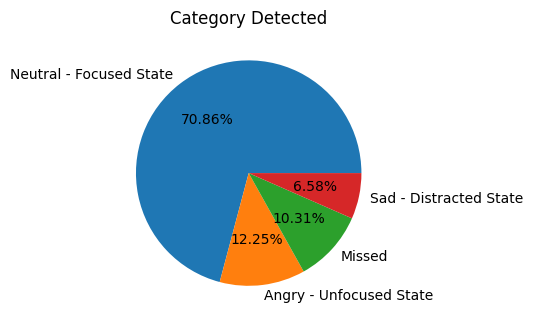

CPU times: user 125 ms, sys: 9.92 ms, total: 135 ms
Wall time: 85.2 ms


In [66]:
%%time
percentage = 0.02
show_statics(df1, percentage)

<Axes: >

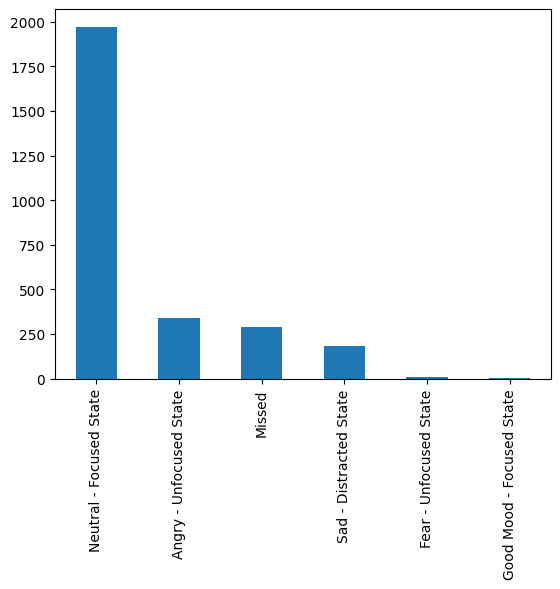

In [67]:
# Create a bar chart
df1['Category Detected'].value_counts().plot(kind='bar')

In [68]:
df1['Category Detected'] = df1['Category Detected'].str.split('-').str[1]

In [61]:
# Create a line plot using Plotly
fig = px.line(df1, x='Frame Number', y='Category Detected', markers=True)

# Customize the plot layout
fig.update_layout(
    plot_bgcolor='white',  # Set the background color to white
    width=1000,  # Set the width of the plot
    height=600  # Set the height of the plot
)

# Show the line plot
fig.show()

fig.write_html("/Users/ihelshal/Kaggle/SDAIA/CogniClass/outputs/Results/foucsed/foucsed.html")